In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Install IPD package
### Option 1 (from source):
1. Clone this github repo
2. Run `pip install -e .[render]` 
    1. Make sure you are using a compatible python version (tested with 3.10.14)
    2. Recommend using a venv

### Option 2 (not available yet):
1. `pip install intrinsic-ipd[render]`

In [11]:
from intrinsic_ipd import IPDReader, IPDCamera, IPDImage, IPDLightCondition
from intrinsic_ipd.constants import CameraFramework, DATASET_IDS
import os
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
np.set_printoptions(precision=4, suppress=True)

In [12]:
import logging
logging.basicConfig(
    level=logging.INFO,  # Set the logging level (INFO, DEBUG, WARNING, etc.)
    format="%(asctime)s - %(name)s - %(levelname)s - %(filename)s - %(funcName)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)

## 2. Download (if not exists) and load dataset

In [13]:
pprint(DATASET_IDS)
dataset = DATASET_IDS[20]
dataset

['dataset_basket_0',
 'dataset_basket_1',
 'dataset_basket_2',
 'dataset_basket_3',
 'dataset_basket_4',
 'dataset_basket_5',
 'dataset_basket_6',
 'dataset_basket_7',
 'dataset_basket_8',
 'dataset_basket_9',
 'dataset_darkbg_0',
 'dataset_darkbg_1',
 'dataset_darkbg_2',
 'dataset_darkbg_3',
 'dataset_darkbg_4',
 'dataset_darkbg_5',
 'dataset_darkbg_6',
 'dataset_darkbg_7',
 'dataset_darkbg_8',
 'dataset_texturedbg_0',
 'dataset_texturedbg_1',
 'dataset_texturedbg_2',
 'dataset_texturedbg_3']


'dataset_texturedbg_1'

In [14]:
ipd_reader = IPDReader("./datasets", dataset, IPDCamera.PHOTONEO, lighting=IPDLightCondition.ROOM, download=True) 

2024-08-29 00:33:54 - root - INFO - reader.py - __init__ - 
	Dataset:	dataset_texturedbg_1
	Dataset Path:	./datasets/dataset_texturedbg_1/test
	Camera Type:	Photoneo (ID: 000)
	Lighting:	ROOM
	Num Scenes:	30


In [18]:
ipd_reader.parts

{'corner_bracket0',
 'corner_bracket6',
 'gear1',
 'handrail_bracket',
 'wraparound_bracket'}

In [15]:
ipd_reader.objects

[('corner_bracket0', 0),
 ('corner_bracket0', 1),
 ('corner_bracket0', 2),
 ('corner_bracket0', 3),
 ('corner_bracket0', 4),
 ('corner_bracket6', 0),
 ('corner_bracket6', 1),
 ('corner_bracket6', 2),
 ('corner_bracket6', 3),
 ('corner_bracket6', 4),
 ('gear1', 0),
 ('gear1', 1),
 ('gear1', 2),
 ('gear1', 3),
 ('handrail_bracket', 0),
 ('handrail_bracket', 1),
 ('handrail_bracket', 2),
 ('handrail_bracket', 3),
 ('handrail_bracket', 4),
 ('wraparound_bracket', 0),
 ('wraparound_bracket', 1),
 ('wraparound_bracket', 2),
 ('wraparound_bracket', 3)]

In [154]:
## Selecting by scene
# o2c_scene_30 = reader.o2c.sel(scene=30)

## Selecting by part (3 ways)
# o2c_part_gear2 = reader.o2c.where(reader.o2c.part == "gear2", drop=True)
# o2c_part_gear2 = reader.o2c.sel(object=[o.item() for o in reader.o2c.object if o.part.item() == "gear2"])
# o2c_part_gear2 = reader.o2c.sel(part="gear2")

## 3. Render

Note that the rendering code uses `pyrender` for offscreen rendering. Please specify a compatible backend. See pyrender's official documentation [here](https://pyrender.readthedocs.io/en/latest/examples/offscreen.html).

In [155]:
# scene = 30
# im = ipd_reader.get_img(scene=scene, image_type=IPDImage.PHOTONEO_HDR)
# plt.imshow(im)

2024-08-22 05:59:04 - root - INFO - reader.py - get_img - Opening image from ./datasets/dataset_texturedbg_1/test/000030/000/rgb/000000.png


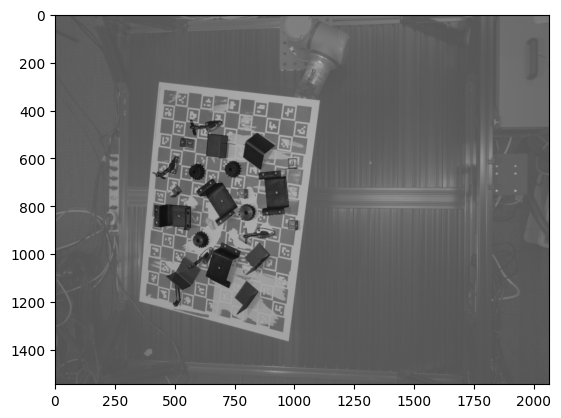

In [156]:
%matplotlib inline
from intrinsic_ipd.render import render_scene
image, rendered_image, overlay = render_scene(ipd_reader, 30)
plt.imshow(overlay)


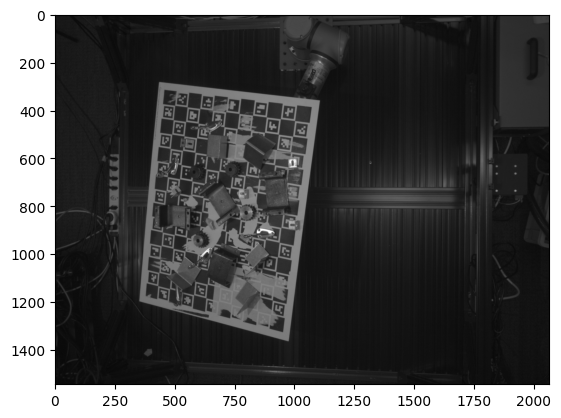

In [157]:
plt.imshow(image)

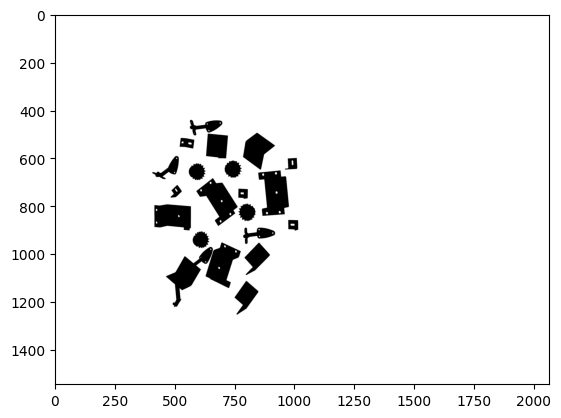

In [158]:
plt.imshow(rendered_image)

In [142]:
## TO SAVE THE IMAGE

# %matplotlib agg

# fig = plt.figure(figsize=(10, 5))
# plt.axis('off')
# plt.imshow(overlay)
# plt.savefig(f'image_{ipd_reader.dataset_id}_{ipd_reader.camera.type}.png', bbox_inches='tight')
# print(f"Image saved to './image_{ipd_reader.dataset_id}_{ipd_reader.camera.type}.png'")

## 4. Get masks of objects

#### 5.1 Render (but don't save) masks for all objects in a scene

In [11]:
masks = ipd_reader.render_masks(scene=30)
mask = masks[ipd_reader.objects[0]]

#### 5.2 Generate and Save Masks for all objects in all scenes

In [12]:
# mask_paths = ipd_reader.create_masks(overwrite=True)
# mask = ipd_reader.get_mask(scene=scene, part="hex_manifold", instance=0, detect_bounding_box=False)

#### 5.3 Display Mask

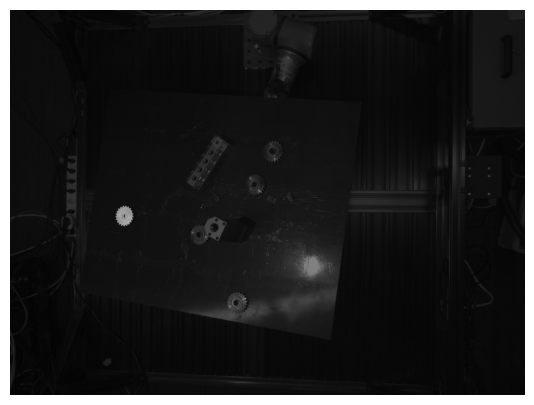

In [13]:
if not mask is None:
    fig = plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.imshow(im, alpha=1)
    plt.imshow(mask, alpha=.5)
    plt.show()